In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
subdir = 'datasets/12-22-18-converted/'
Titles = pd.read_csv(subdir+'Titles-basic.csv')
Titles = Titles[Titles['titleType']=='movie']
print('Length of file: %d'%len(Titles))

Length of file: 505981


In [3]:
Titles.describe()

,isAdult,startYear,endYear,runtimeMinutes
count,505981.000000,454587.000000,0.0,317197.000000
mean,0.016839,1986.500716,NaN,87.675240
std,0.128667,30.016333,NaN,104.612448
min,0.000000,1894.000000,NaN,1.000000
25%,0.000000,1968.000000,NaN,72.000000
50%,0.000000,1997.000000,NaN,88.000000
75%,0.000000,2012.000000,NaN,99.000000
max,1.000000,2115.000000,NaN,51420.000000


In [4]:
#preliminary filtering remove adult films and only movies from 2018 (and now earlier than 1920) and earlier
Titles = Titles[(Titles['isAdult']==0) & (Titles['startYear']<2019)]
Titles = Titles[Titles['startYear']>1920]

In [5]:
gbyYear = Titles.groupby(['startYear']).agg(['mean','count','median','min','max','std'])
gbyYear.tail()

isAdult                            endYear                           \
             mean  count median min max  std    mean count median min max std   
startYear                                                                       
2014.0          0  15586      0   0   0  0.0     NaN     0    NaN NaN NaN NaN   
2015.0          0  16233      0   0   0  0.0     NaN     0    NaN NaN NaN NaN   
2016.0          0  17387      0   0   0  0.0     NaN     0    NaN NaN NaN NaN   
2017.0          0  17760      0   0   0  0.0     NaN     0    NaN NaN NaN NaN   
2018.0          0  17169      0   0   0  0.0     NaN     0    NaN NaN NaN NaN   

          runtimeMinutes                                        
                    mean  count median  min     max        std  
startYear                                                       
2014.0         84.201004  12950   86.0  1.0   549.0  29.437048  
2015.0         84.928469  13211   86.0  1.0  6000.0  87.577460  
2016.0         84.164267  13545   86.0  1.0  1834.0  40.878116  
2017.0         82.518480  13582   86.0  1.0  6017.0  65.158298  
2018.0         83.651357  11605   88.0  1.0  1320.0  37.360319

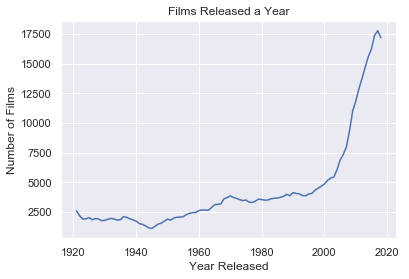

In [6]:
sns.set(style="darkgrid")
byYr = sns.lineplot(x=gbyYear.index.values,y=gbyYear[('isAdult','count')])
plt.ylabel('Number of Films')
plt.xlabel('Year Released')
plt.title('Films Released a Year')
plt.show()

### whats going on with the huge uptick here lets see if there are some outliers in the run times

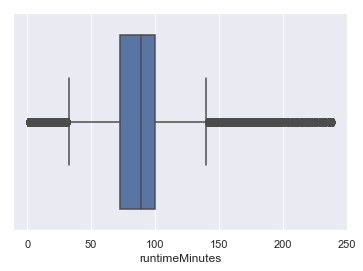

In [7]:
#doing this orginally yielded a huge descrepency - apparently the longest film is 240hrs long and
#many more in the 24-6 hr range, for this we will make 4 hrs the cut off which is roughly the lenght of
#the extended version of LOTR: Twin towers
Titles = Titles[Titles['runtimeMinutes']<4*60]
sns.boxplot(Titles['runtimeMinutes'])
plt.show()

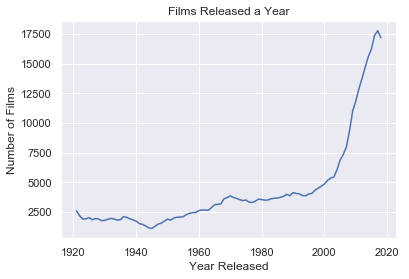

In [8]:
byYear = Titles.groupby(['startYear']).agg(['mean','count','median','min','max','std'])
byYr = sns.lineplot(x=gbyYear.index.values,y=gbyYear[('isAdult','count')])
plt.ylabel('Number of Films')
plt.xlabel('Year Released')
plt.title('Films Released a Year')
plt.show()

##### So based on above we should look at some drivers for the huge up tick after 2000

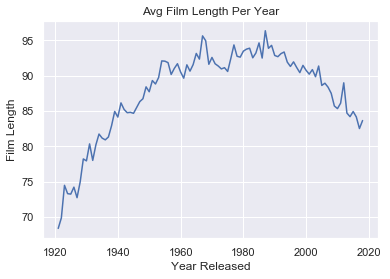

In [9]:
byYr = sns.lineplot(x=gbyYear.index.values,y=gbyYear[('runtimeMinutes','mean')])
plt.ylabel('Film Length')
plt.xlabel('Year Released')
plt.title('Avg Film Length Per Year')
plt.show()

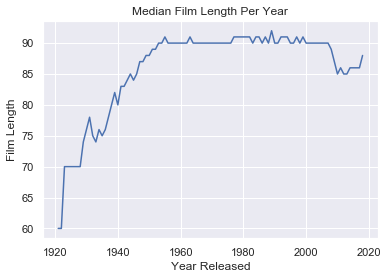

In [10]:
byYr = sns.lineplot(x=gbyYear.index.values,y=gbyYear[('runtimeMinutes','median')])
plt.ylabel('Film Length')
plt.xlabel('Year Released')
plt.title('Median Film Length Per Year')
plt.show()

/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


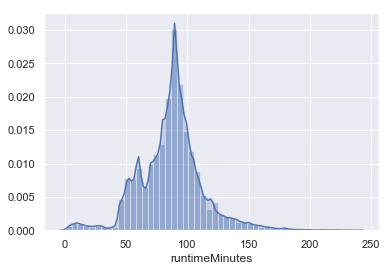

In [11]:
sns.distplot(Titles['runtimeMinutes'],hist=True,rug=False,kde_kws={'shade':True})


plt.show()

In [138]:
#animation attempt
#this saves all the PNG's
years = Titles.startYear.unique()
years.sort()

for i in years:
    tFrame = Titles[Titles['startYear']==i]
    yearFixed = str(i)[:-2]
    plt.figure(figsize=(6,5))
    ydist = sns.distplot(tFrame['runtimeMinutes'],hist=True,rug=False,kde_kws={'shade':True})
    plt.xlabel('Run Time Distribution')
    plt.yticks([])
    plt.title('Year: '+yearFixed)
    plt.xlim(0,250)
    plt.savefig('datasets/runtime-year/%s.png'%yearFixed)
    #plt.show()

/Users/bradkittrell/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [12]:
Titles = Titles.reset_index(drop=True)
print(len(Titles))
Titles.head()

303368


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0003854,movie,Dodge City Trail,Dodge City Trail,0,1936.0,NaN,56.0,"Adventure,Music,Western"
1,tt0005076,movie,Charley's Aunt,Charley's Aunt,0,1925.0,NaN,80.0,Comedy
2,tt0005929,movie,The Prince of Pep,The Prince of Pep,0,1925.0,NaN,30.0,NaN
3,tt0006626,movie,Elnémult harangok,Elnémult harangok,0,1922.0,NaN,52.0,NaN
4,tt0010859,movie,A Tale of Two Worlds,A Tale of Two Worlds,0,1921.0,NaN,70.0,Drama


In [13]:
dummies=Titles['genres'].str.get_dummies(sep=',')
print(len(dummies))

303368


In [38]:
titles= pd.concat([Titles, dummies], axis=1, sort=False) #renamed to just titles,  easier to type
genres_sum = dummies.sum()
totbyGenre = pd.DataFrame(dummies.columns.values,columns=['Genre'])
totbyGenre['sum'] = genres_sum.values
totbyGenre['pct_tot'] = totbyGenre['sum']/totbyGenre['sum'].sum()
totbyGenre = totbyGenre.sort_values('pct_tot',ascending=False).reset_index(drop=True)
totbyGenre.head(5)

,Genre,sum,pct_tot
0,Drama,119115,0.253051
1,Documentary,70612,0.150010
2,Comedy,63762,0.135458
3,Romance,26892,0.057130
4,Action,25299,0.053746


In [43]:
byyearRev = titles.groupby(['startYear']).agg(['sum']).reset_index(drop=True)
byyearRev = byyearRev.set_axis([f"{x}-{y}" for x, y in byyearRev.columns], axis=1, inplace=False)
print(byyearRev.columns)

Index(['tconstsum', 'titleTypesum', 'primaryTitlesum', 'isAdultsum',
       'endYearsum', 'runtimeMinutessum', 'Actionsum', 'Adultsum',
       'Adventuresum', 'Animationsum', 'Biographysum', 'Comedysum', 'Crimesum',
       'Documentarysum', 'Dramasum', 'Familysum', 'Fantasysum', 'Film-Noirsum',
       'Game-Showsum', 'Historysum', 'Horrorsum', 'Musicsum', 'Musicalsum',
       'Mysterysum', 'Newssum', 'Reality-TVsum', 'Romancesum', 'Sci-Fisum',
       'Shortsum', 'Sportsum', 'Talk-Showsum', 'Thrillersum', 'Warsum',
       'Westernsum'],
      dtype='object')


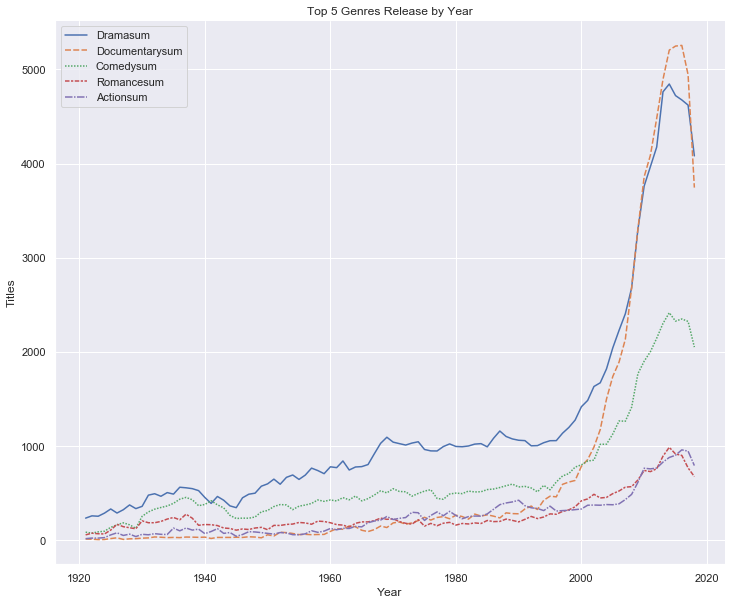

In [141]:
#byyearRev = byyearRev.drop(columns=['tconstsum','titleTypesum','primaryTitlesum','isAdultsum','endYearsum','runtimeMinutessum'])
from matplotlib.pyplot import figure
top5 = byyearRev[['Dramasum','Documentarysum','Comedysum','Romancesum','Actionsum']]
top5.index = gbyYear.index

plt.figure(figsize=(12,10))
lps = sns.lineplot(data=top5)
sns.despine()
plt.xlabel('Year')
plt.ylabel('Titles')
plt.title('Top 5 Genres Release by Year')
plt.show()

### Documentaries have rapidly grown, especially since the year 2000. Interesting, this begs many more questions as to why this has occurred

In [142]:
#save massaged data
titles.to_csv(subdir+'titles-genre.csv',index=False)